## Getting Data

In [11]:
import requests

In [12]:
city = 'meerut'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '6edad1d74e3e5f252e667bb060b561d8ff9ab1d0'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 534,
 'idx': 12430,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [29.06351, 77.709723],
  'name': 'Pallavpuram Phase 2, Meerut, India',
  'url': 'https://aqicn.org/city/india/meerut/pallavpuram-phase-2'},
 'dominentpol': 'pm10',
 'iaqi': {'co': {'v': 26.1},
  'dew': {'v': 12.5},
  'h': {'v': 59},
  'no2': {'v': 102.5},
  'o3': {'v': 0.7},
  'p': {'v': 741},
  'pm10': {'v': 534},
  'pm25': {'v': 233},
  'so2': {'v': 6},
  't': {'v': 34.125},
  'w': {'v': 0.37500000000000006}},
 'time': {'s': '2020-12-08 19:00:00',
  'tz': '+05:30',
  'v': 1607454000,
  'iso': '2020-12-08T19:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 34,
     'day': '2020-12-06',
     'max': 85,
     'min': 19},
    {'avg': 39, 'day': '2020-12-07', 'max': 71, 'min': 30},
    {'avg': 27, 'day': '2020-12-08', 'max': 56, 

## Extracting Air Quality Information

In [13]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


co : 26.1
dew : 12.5
h : 59
no2 : 102.5
o3 : 0.7
pm10 : 534
pm25 : 233
so2 : 6
t : 34.125
w : 0.37500000000000006


In [14]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


meerut AQI : 534 

Individual Air quality
Dew : {'v': 12.5}
no2 : {'v': 102.5}
Ozone : {'v': 0.7}
sulphur : {'v': 6}
pm10 : {'v': 6}
pm25 : {'v': 233}


## Plotting Graph Of Pollutants

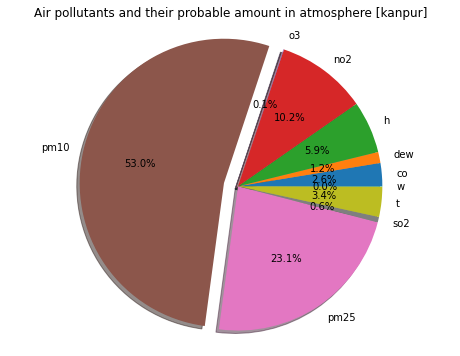

In [15]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()


## Plotting a Map of the City

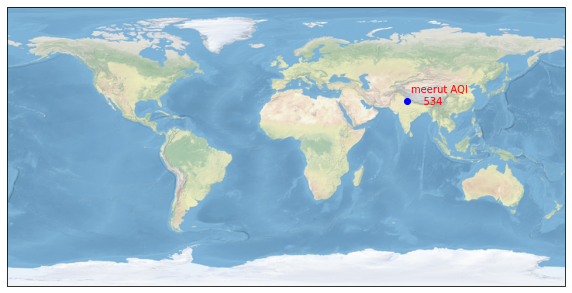

In [16]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()
